<a href="https://colab.research.google.com/github/henrybearden/SYS3501/blob/main/BeardenH_SYSFINALB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

extreme = pd.read_csv('/content/xdmgnd.csv')
print(extreme.head())

   Unnamed: 0  IYR  IMO RAILROAD    INCDTNO  IYR2  IMO2  RR2 INCDTNO2  IYR3  \
0           1    1    3      ATK     067106   NaN   NaN  NaN      NaN     1   
1           2    1    3     BNSF  MT0301100   NaN   NaN  NaN      NaN     1   
2           3    1    3     BNSF  MT0301103   NaN   NaN  NaN      NaN     1   
3           4    1    1     BNSF  AO0101104   NaN   NaN  NaN      NaN     1   
4           5    1    1     BNSF  DK0101112   NaN   NaN  NaN      NaN     1   

   ...  Longitud SIGNAL MOPERA  ADJUNCT1 ADJUNCT2  ADJUNCT3  SUBDIV  \
0  ...       NaN    NaN    NaN       NaN      NaN       NaN     NaN   
1  ...       NaN    NaN    NaN       NaN      NaN       NaN     NaN   
2  ...       NaN    NaN    NaN       NaN      NaN       NaN     NaN   
3  ...       NaN    NaN    NaN       NaN      NaN       NaN     NaN   
4  ...       NaN    NaN    NaN       NaN      NaN       NaN     NaN   

         Type      Typeq  Cause  
0  Derailment  Passenger      T  
1  Derailment    Freight      

<ipython-input-3-d337b28422a1>:3: DtypeWarning: Columns (100,121) have mixed types. Specify dtype option on import or set low_memory=False.
  extreme = pd.read_csv('/content/xdmgnd.csv')


Q1-Q2

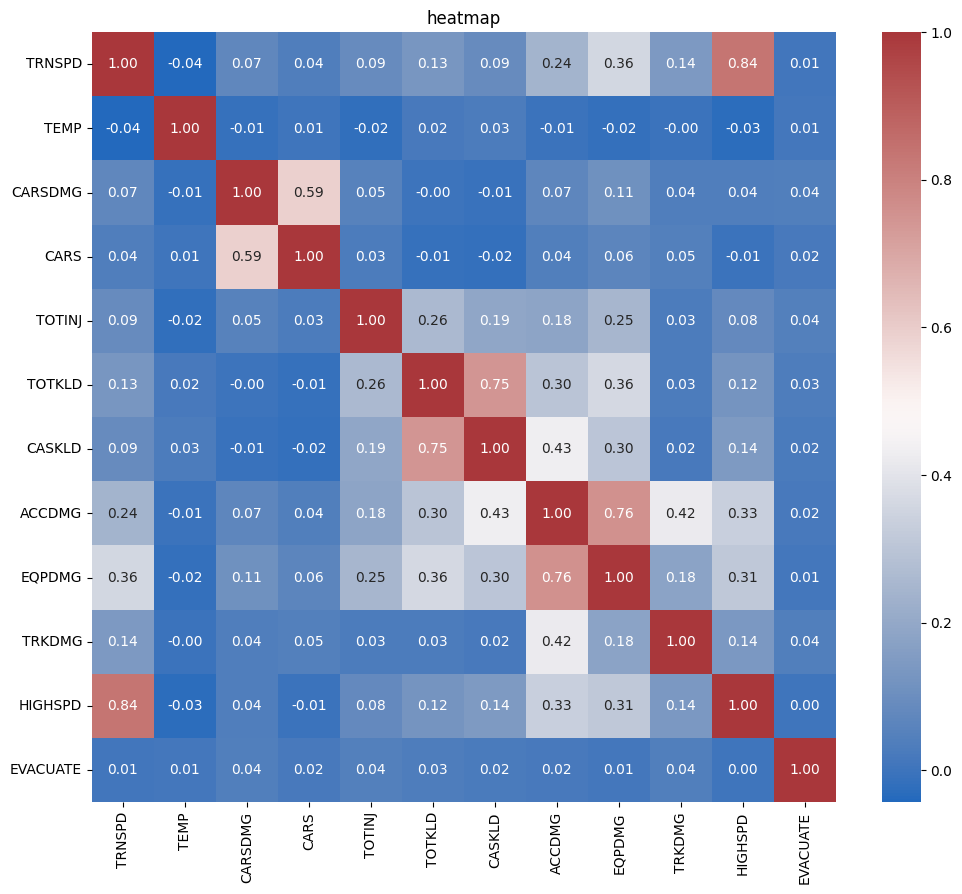

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['TRNSPD', 'TEMP', 'CARSDMG', 'CARS', 'TOTINJ', 'TOTKLD', 'CASKLD', 'ACCDMG', 'EQPDMG', 'TRKDMG', 'HIGHSPD', 'EVACUATE']
extremeheat = extreme[cols]

corrmatrix = extremeheat.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corrmatrix, annot=True, cmap='vlag', fmt=".2f")
plt.title('heatmap')
plt.show()

Q3-Q4

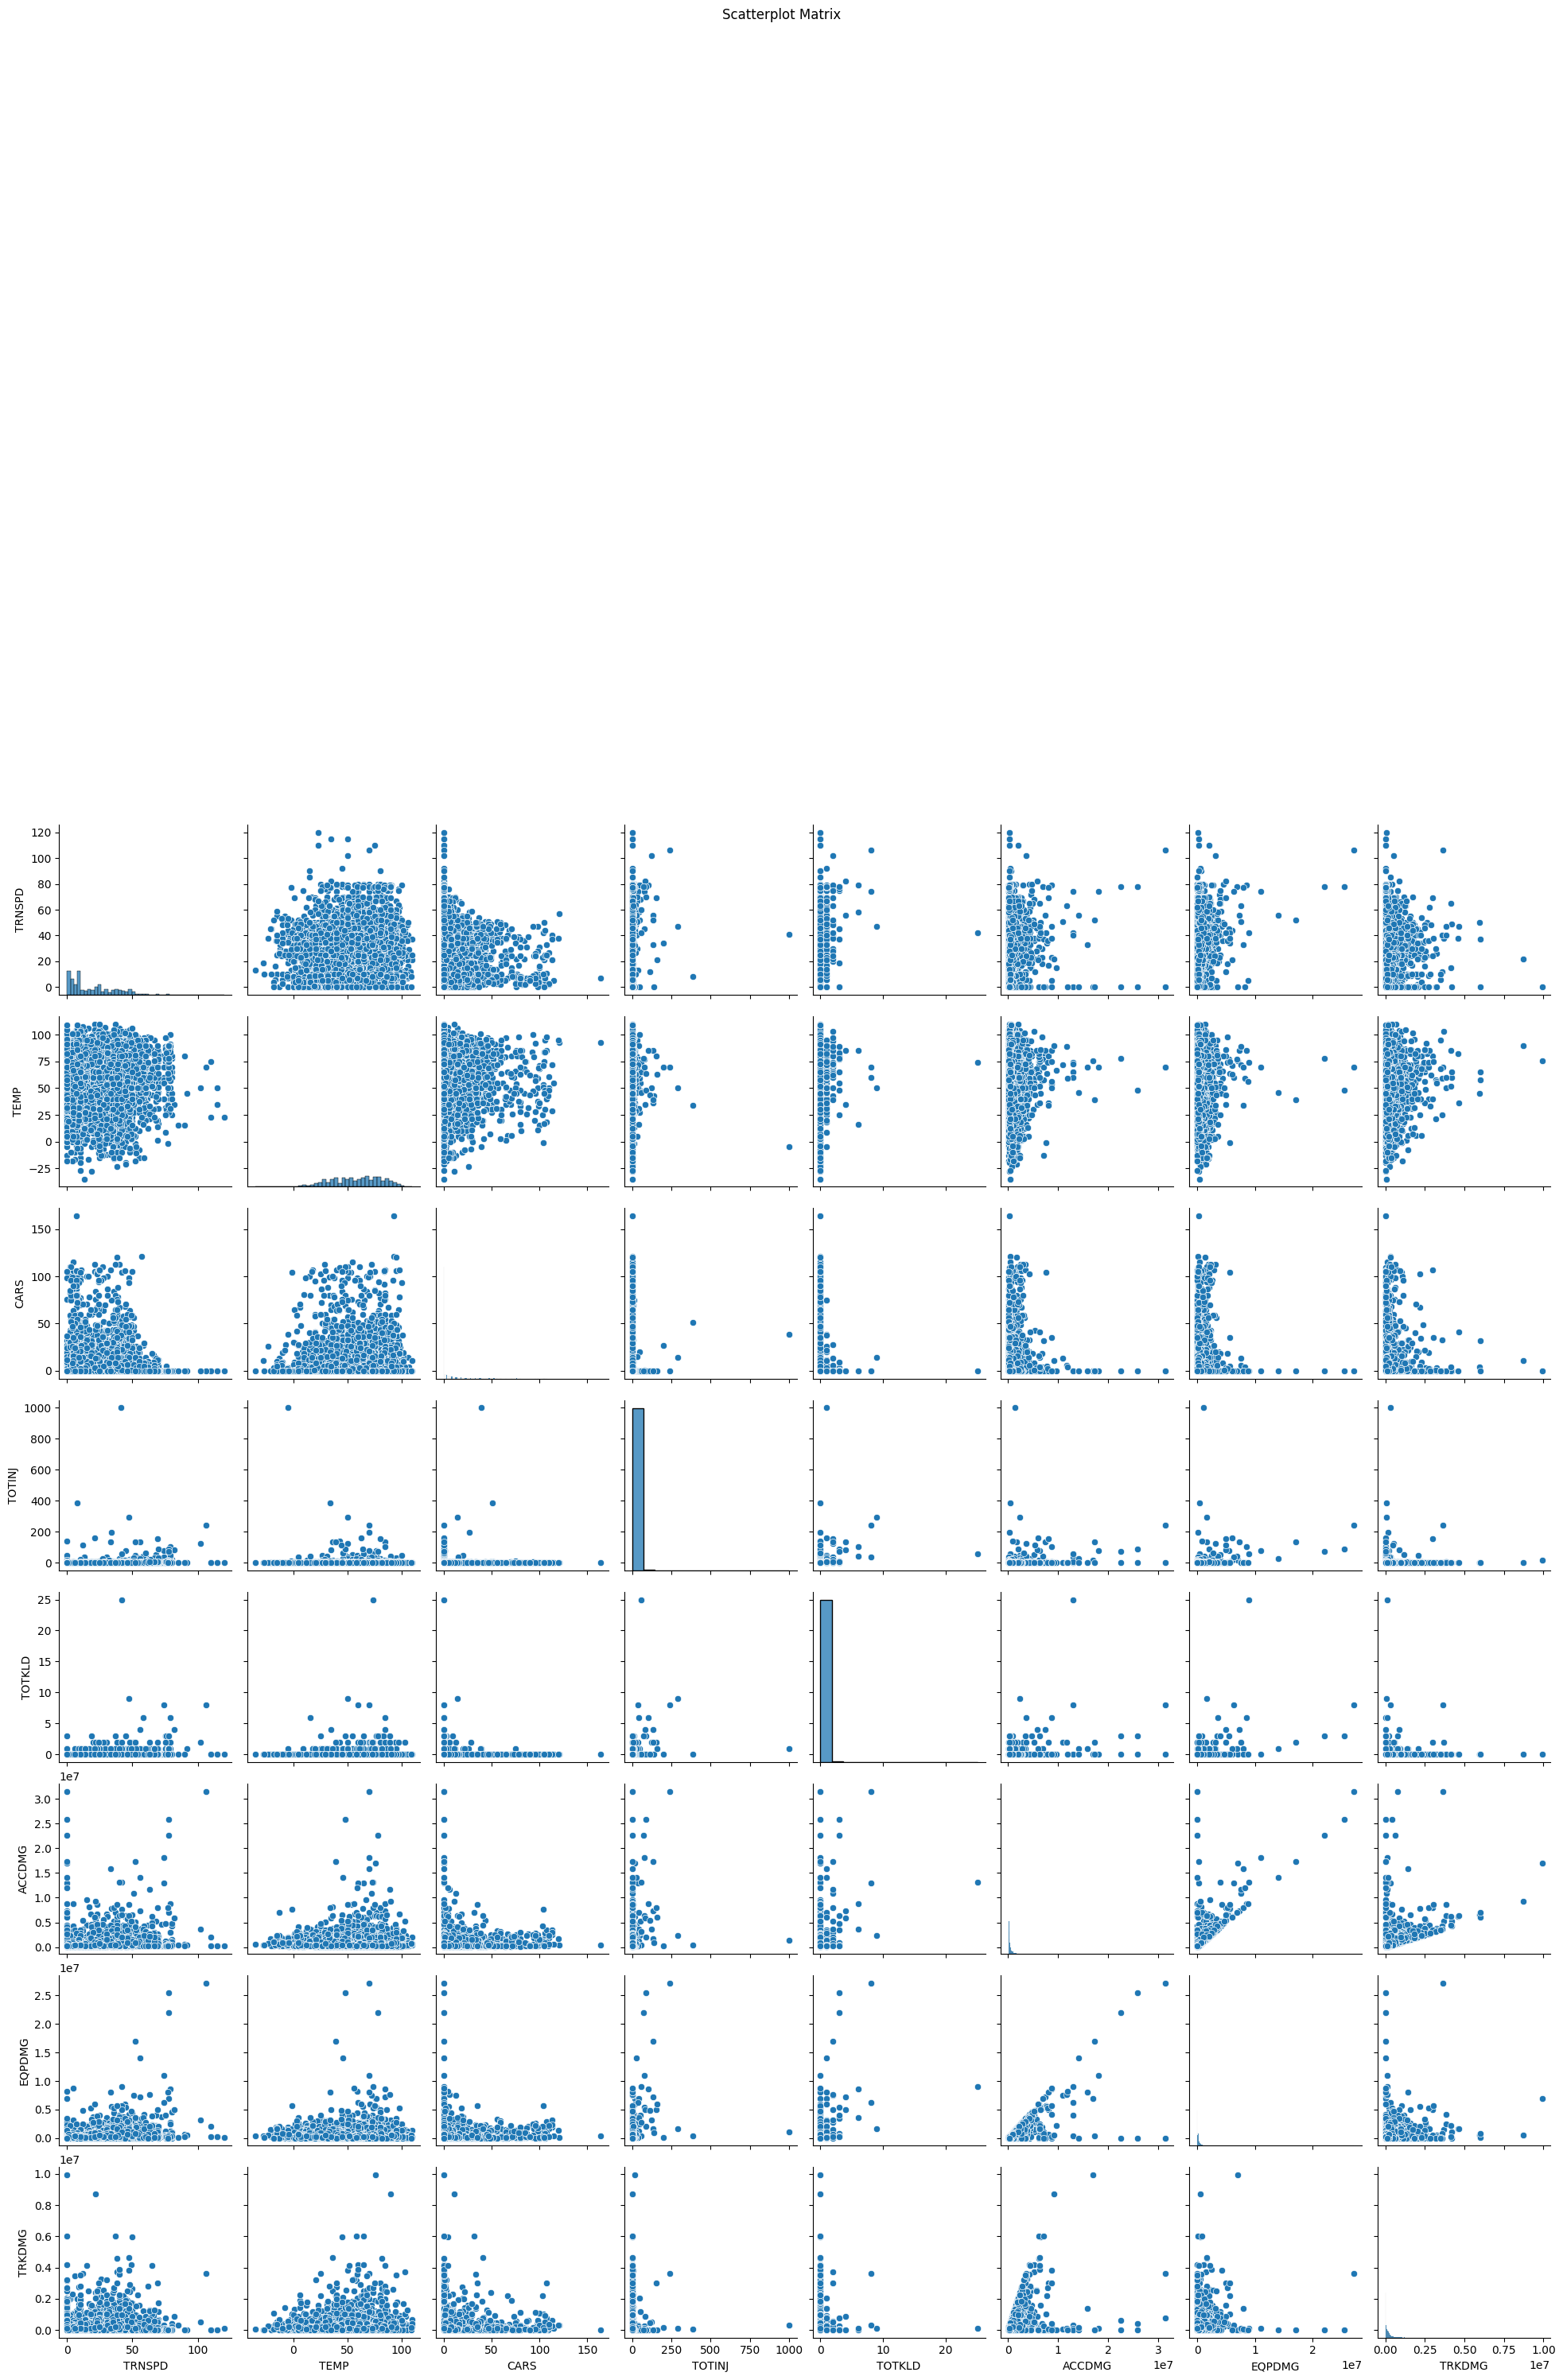

In [31]:
scattercols = ['TRNSPD', 'TEMP', 'CARS', 'TOTINJ', 'TOTKLD', 'ACCDMG', 'EQPDMG', 'TRKDMG']
extremescatter = extreme[scattercols]

extremescatter = extremescatter.dropna()

sns.pairplot(extremescatter)
plt.suptitle('Scatterplot Matrix', y=1.5)
plt.show()

Q5-Q7

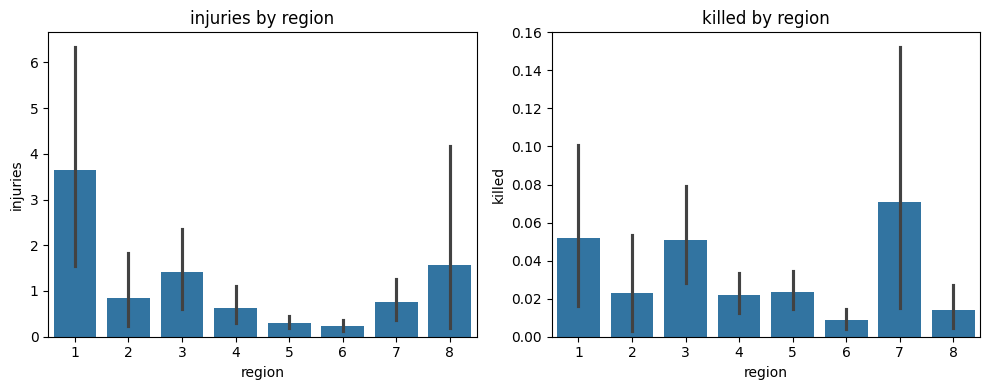

In [35]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x='REGION', y='TOTINJ', data=extreme)
plt.title('injuries by region')
plt.xlabel('region')
plt.ylabel('injuries')

plt.subplot(1, 2, 2)
sns.barplot(x='REGION', y='TOTKLD', data=extreme)
plt.title('killed by region')
plt.xlabel('region')
plt.ylabel('killed')

plt.tight_layout()
plt.show()

Q8-Q9

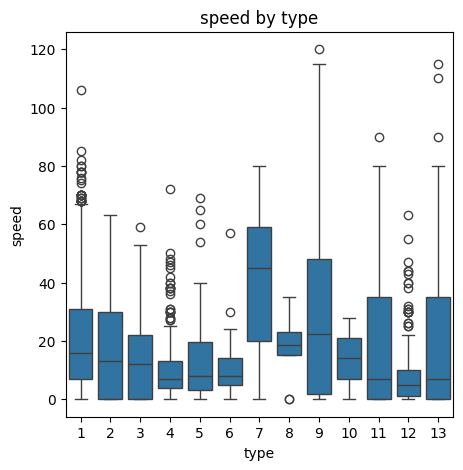

In [36]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='TYPE', y='TRNSPD', data=extreme)
plt.title('speed by type')
plt.xlabel('type')
plt.ylabel('speed')
plt.show()

Q10

In [11]:
print(extreme['ACCDMG'].mean())

715518.8735858984


Q11

In [12]:
print(extreme['TOTINJ'].max())

1000


Q12

In [13]:
print(extreme.loc[extreme['TOTINJ'].idxmax(), 'IMO'])

1


Q13 ***

In [14]:
maxinj = extreme.loc[extreme['TOTINJ'].idxmax()]

print(maxinj['CAUSE'])
print(maxinj['TYPE'])
print(maxinj['ACCDMG'])
print(maxinj['WEATHER'])

T215
1
1327730
2


Q14

In [15]:
print(maxinj['CARS'])

39


Q15

In [16]:
print(extreme['TOTKLD'].sum())

218


Q16

In [17]:
print(extreme['TRKDNSTY'].isnull().sum())

2311


Q17

In [18]:
print(extreme['AMPM'].isnull().sum())

print(extreme['TONS'].mean())

0
6890.948697711128


Q18

In [19]:
wordcount = 0
for entry in extreme['NARR1']:
    wordcount += len(entry.split())

print(wordcount)

126450


Q19

In [20]:
wordcount/len(extreme['NARR1'])

16.633780584056826

Q20

In [ ]:
caplet = 0
for i in range (1):
    nar = extreme['NARR1'].iloc[i]
    caplet += sum(1 for c in nar if c.isupper())

print(caplet)

Q21***

In [38]:
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')

def frequent(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    wordcounts = {}
    for word in tokens:
        if word in wordcounts:
            wordcounts[word] += 1
        else:
            wordcounts[word] = 1
    if not wordcounts:
        return None
    return wordcounts

allnar = ' '.join(extreme['NARR1'])

print(frequent(allnar)) # couldnt figure out shortlist, ran out of time

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'train': 3280, 'no.': 32, '5': 271, 'engs': 12, '140/141': 1, '16': 73, 'cars': 3037, 'derailed': 3232, 'engine': 171, 'units': 200, '11': 175, 'mp419.9': 1, '20': 82, 'mile': 95, 'burned': 34, 'journal': 122, 'bearing': 43, 'freight-': 1, 'hazardous': 109, 'materials': 64, 'leaking': 8, 'crew': 894, 'used': 15, 'excessive': 81, 'horsepower': 2, 'attempting': 15, 'shove': 77, '96': 10, 'track': 2564, '6': 250, 'empty': 99, 'p': 35, 'lading': 3, 'fell': 47, 'floor': 3, 'container': 13, 'derailing': 195, 'multiple': 12, 'platform': 3, 'intermodal': 12, 'car': 967, 'drug': 5, 'mp95': 1, 'mp98.3': 2, 'wheel': 202, 'riding': 13, 'ties': 17, 'crossing': 266, 'trucks': 27, 'came': 74, 'apart': 6, 'moving': 234, 'east': 640, 'main': 1363, 'experienced': 197, 'emergency': 585, 'brake': 103, 'application': 63, 'derailment': 213, '26': 55, 'ca': 62, 'amtrak': 96, '17': 78, 'traveling': 1189, 'westbound': 252, 'bnsf': 351, 'near': 84, 'nodaway': 1, 'ia': 6, '2': 777, 'locomotives': 254, 'several'

Q22

In [37]:
drcount = 0
for entry in extreme['NARR1']:
    drcount += entry.lower().count('derailed')

print(drcount)

3239


Q23

In [22]:
print(len(extreme[extreme['TYPE'] == 1]))

6117


Q24***

In [28]:
dronly = extreme[extreme['TYPE'] == 'Derailment']

print(dronly['TRNSPD'].mean())

nan


Q25

In [26]:
col = extreme[['ACCDMG', 'TRNSPD', 'TONS', 'TEMP', 'TYPE', 'Cause']]

print(col.isnull().sum().sum())

colclean = col.dropna()

0
